# THS

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import warnings
from IPython.display import Image

warnings.filterwarnings("ignore")
orbits = np.genfromtxt(r"C:\Users\kevin\OneDrive\Email attachments\Escritorio\nbody_sh1\outTHS2.txt", delimiter = ' ', usecols = range(0,7), invalid_raise=False)

In [58]:
b_ = []

# Crear 200 matrices similares a b_1 y b_2
for _ in range(200):
    matriz = np.zeros(shape=(int(len(orbits)/200),3))
    b_.append(matriz)

for j in range(200):
    for i in range(int(len(orbits)/200)):
        b_[j][i][0] = orbits[i*200+j][1]
        b_[j][i][1] = orbits[i*200+j][2]
        b_[j][i][2] = orbits[i*200+j][3]
        
print(b_[3])
print((len(b_[1])))

[[-1.04281722  2.32151176  3.1820479 ]
 [-1.03318173  2.27207555  3.14797554]
 [-0.98691172  2.09564024  3.06525887]
 [-1.03654661  2.11819462  2.70859147]
 [-1.08872559  1.84709684  2.38783001]
 [-0.95325417  1.50609957  1.78152992]
 [-0.89563057  1.34026961  0.85040416]
 [-0.27361521  0.87231703 -0.04805605]
 [-0.65977898 -1.78397732  0.42071326]
 [-0.18934375 -3.99140566  1.1836173 ]
 [ 0.31642462 -5.61116321  1.72271232]]
11


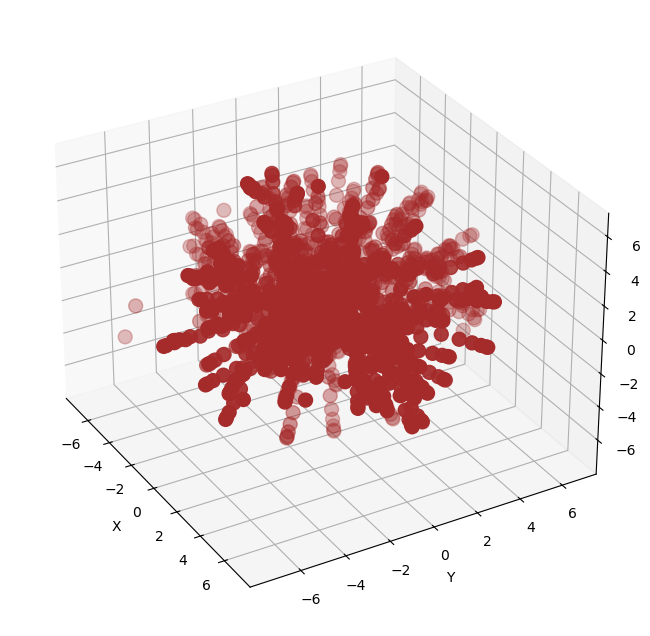

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
   
#b_1 = np.zeros(shape = (int(len(orbits)/200), 3))
#b_2 = np.zeros(shape = (int(len(orbits)/200), 3))

#for i in range(int(len(orbits)/200)):
    #for j in range(200):
        #b_[j][i][0] = orbits[i*200][1]
        #b_[j][i][1] = orbits[i*200][2]
        #b_[j][i][2] = orbits[i*200][3]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.set_xlim(b_2[:,0].min(),b_2[:,0].max())
#ax.set_ylim(b_2[:,1].min(),b_2[:,1].max())
#ax.set_zlim(b_2[:,2].min(),b_2[:,2].max())

for i in range(200):
    ax.scatter(b_[i][:,0], b_[i][:,1], b_[i][:,2], s = 100, color = 'brown')

ax.view_init(30, -30)
plt.savefig('THS.png', dpi = 300)
plt.show()

# Dispendious animation

In [60]:
for i in tqdm(range(len(b_[1]))):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection = '3d')
    
    for j in range(200):
        ax.scatter(b_[j][i,0], b_[j][i,1], b_[j][i,2], s = 100, color = 'blue')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    
    ax.set_title('THS')

    ax.view_init(30, -30)
    
    plt.savefig(f"{i}.png")
    plt.close()
    
from PIL import Image
import os

images = [Image.open(f"{i}.png") for i in range(len(b_[1]))]
images[0].save('THS.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

for i in range (len(b_[1])):
    os.remove(f"{i}.png")

100%|██████████| 11/11 [00:23<00:00,  2.16s/it]


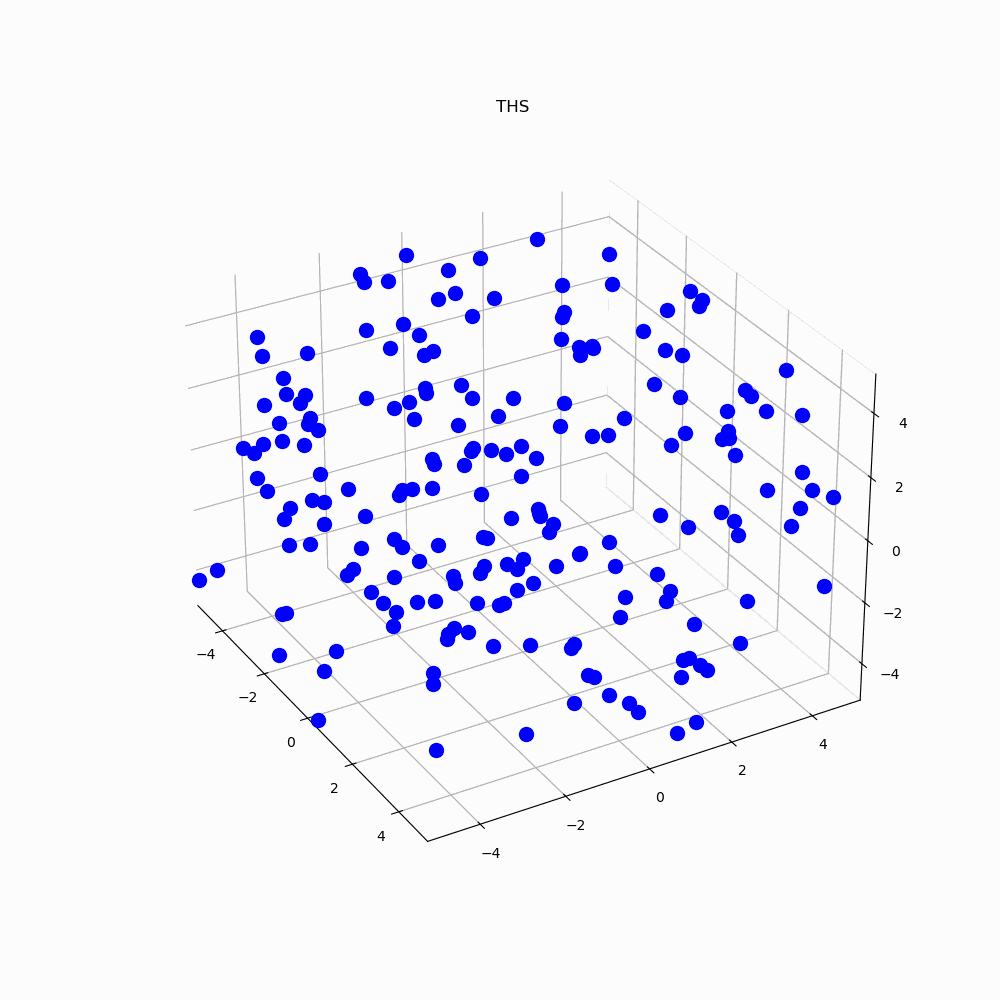

In [61]:
from IPython.display import Image

Image(filename='THS.gif')

# Fast animation

In [ ]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # useful for a webserver case where you don't want to ever visualize the result live.
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# Change to reflect your file location!
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'


# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='2 Body Problem', artist='Edoardo Santo')
writer = PillowWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10,10))

line1, = ax.plot([],[],[], color = 'red')
line2, = ax.plot([],[],[], color = 'blue')

ax.set_xlim(b_2[:,0].min()-0.01,b_2[:,0].max()+0.01)
ax.set_ylim(b_2[:,1].min()-0.01,b_2[:,1].max()+0.01)
ax.set_zlim(b_2[:,2].min()-0.01,b_2[:,2].max()+0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Pluto vs Sun orbit')

ax.scatter(0,0,0, s = 100, color = 'brown')

ax.view_init(30, -30)

xlist1 = []
xlist2 = []
ylist1 = []
ylist2 = []
zlist1 = []
zlist2 = []

with writer.saving(fig, "Pluto vs Sun orbit, lineplot.gif", 100):
    for i in tqdm(range(len(b_1))):
        
        xlist1.append(b_1[i][0])
        ylist1.append(b_1[i][1])
        zlist1.append(b_1[i][2])
        
        xlist2.append(b_2[i][0])
        ylist2.append(b_2[i][1])
        zlist2.append(b_2[i][2])
        
        line1.set_data(xlist1, ylist1)
        line1.set_3d_properties(zlist1)
        
        line2.set_data(xlist2, ylist2)
        line2.set_3d_properties(zlist2)
        
        writer.grab_frame()
        #plt.cla()